In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate random demographic and health data
age = np.random.randint(30, 80, n_samples)
gender = np.random.choice(['Male', 'Female'], n_samples)
income = np.random.randint(20000, 100000, n_samples)
bmi = np.random.uniform(18.5, 40, n_samples)
smoking = np.random.choice(['Yes', 'No'], n_samples)
physical_activity = np.random.choice(['Low', 'Moderate', 'High'], n_samples)
hypertension = np.random.choice(['Yes', 'No'], n_samples)
cholesterol = np.random.uniform(150, 300, n_samples)

# Generate random chronic disease outcome
# Here we assume a simplified relationship between variables
def generate_chronic_disease(age, bmi, smoking, physical_activity, hypertension, cholesterol):
    risk = (age * 0.2) + (bmi * 0.3) + (cholesterol * 0.1)
    if smoking == 'Yes':
        risk += 20
    if physical_activity == 'Low':
        risk += 15
    elif physical_activity == 'Moderate':
        risk += 5
    else:
        risk -= 10
    if hypertension == 'Yes':
        risk += 25
    return 1 if risk > 50 else 0

chronic_disease = [generate_chronic_disease(age[i], bmi[i], smoking[i], physical_activity[i], hypertension[i], cholesterol[i]) for i in range(n_samples)]

# Create a DataFrame
df = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Income': income,
    'BMI': bmi,
    'Smoking': smoking,
    'Physical_Activity': physical_activity,
    'Hypertension': hypertension,
    'Cholesterol': cholesterol,
    'Chronic_Disease': chronic_disease
})

# Save the synthetic dataset to a CSV file
df.to_csv('synthetic_chronic_diseases.csv', index=False)

# Display the first few rows of the dataset
df.head()


,Age,Gender,Income,BMI,Smoking,Physical_Activity,Hypertension,Cholesterol,Chronic_Disease
0,68,Male,97236,19.731525,No,Low,Yes,160.637394,1
1,58,Male,56509,23.342310,No,High,Yes,202.469409,1
2,44,Male,62534,21.324012,No,Moderate,Yes,279.374476,1
3,72,Female,38787,27.074975,Yes,Moderate,No,184.960922,1
4,37,Male,68845,38.336396,Yes,High,Yes,254.278120,1


In [4]:
df = pd.read_csv('synthetic_chronic_diseases.csv')
df.head()


,Age,Gender,Income,BMI,Smoking,Physical_Activity,Hypertension,Cholesterol,Chronic_Disease
0,68,Male,97236,19.731525,No,Low,Yes,160.637394,1
1,58,Male,56509,23.342310,No,High,Yes,202.469409,1
2,44,Male,62534,21.324012,No,Moderate,Yes,279.374476,1
3,72,Female,38787,27.074975,Yes,Moderate,No,184.960922,1
4,37,Male,68845,38.336396,Yes,High,Yes,254.278120,1


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1000 non-null   int64  
 1   Gender             1000 non-null   object 
 2   Income             1000 non-null   int64  
 3   BMI                1000 non-null   float64
 4   Smoking            1000 non-null   object 
 5   Physical_Activity  1000 non-null   object 
 6   Hypertension       1000 non-null   object 
 7   Cholesterol        1000 non-null   float64
 8   Chronic_Disease    1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
None
               Age        Income          BMI  Cholesterol  Chronic_Disease
count  1000.000000   1000.000000  1000.000000  1000.000000      1000.000000
mean     54.830000  60297.562000    29.302033   224.643140         0.810000
std      14.346809  22657.577103     6.261822    42.813148         0.39

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

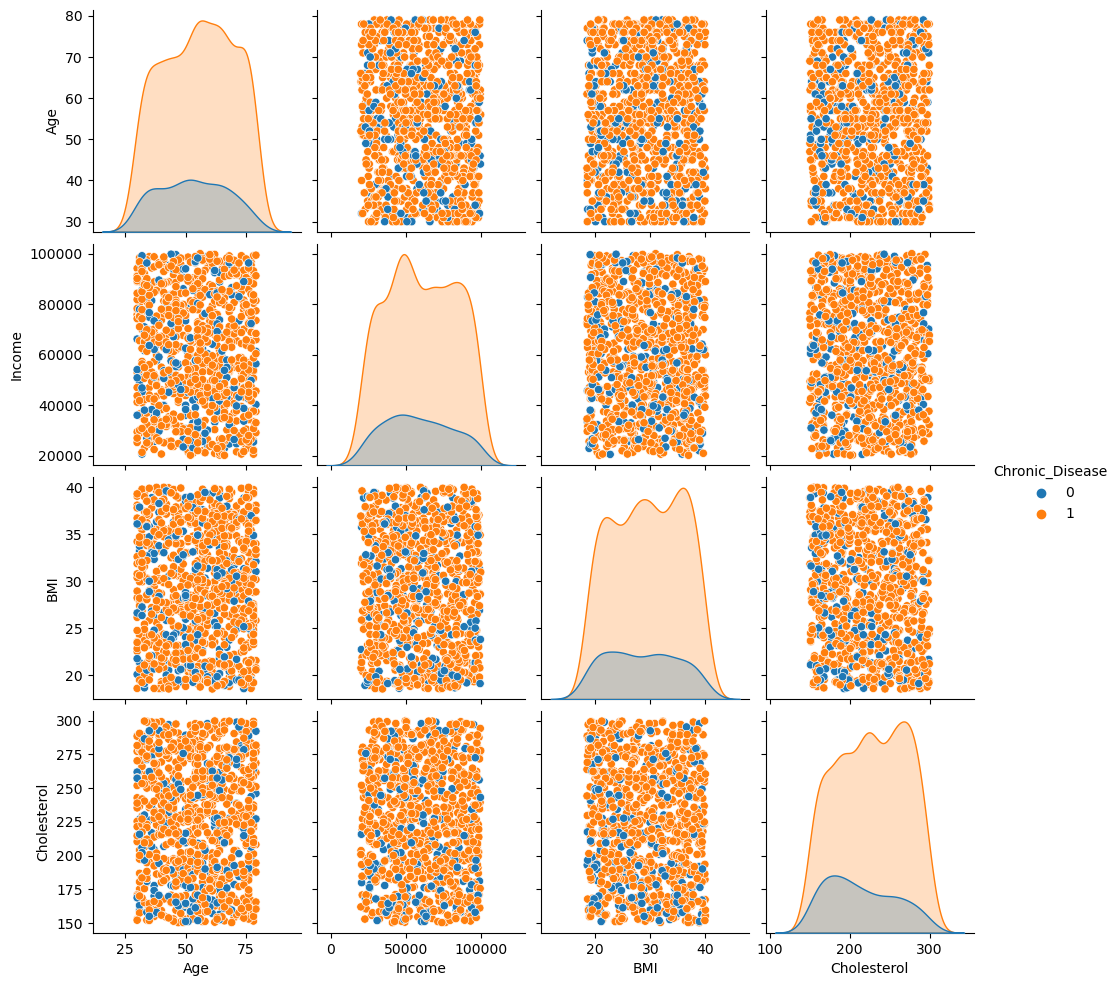

In [6]:
sns.pairplot(df, hue='Chronic_Disease')
plt.show()


In [7]:
df.fillna(method='ffill', inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11088\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
df = pd.get_dummies(df, drop_first=True)


In [9]:
X = df.drop('Chronic_Disease', axis=1)
y = df['Chronic_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [11]:
y_pred = model.predict(X_test)


Accuracy: 0.9566666666666667
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        59
           1       0.96      0.99      0.97       241

    accuracy                           0.96       300
   macro avg       0.95      0.91      0.93       300
weighted avg       0.96      0.96      0.96       300



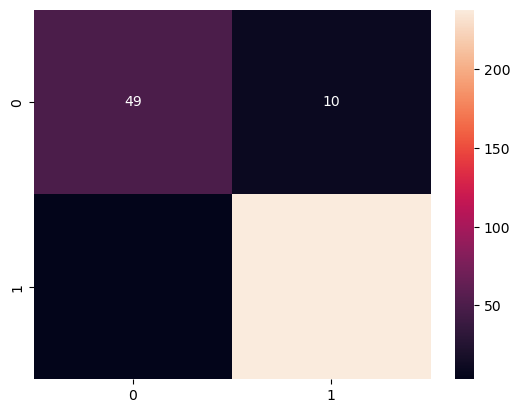

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


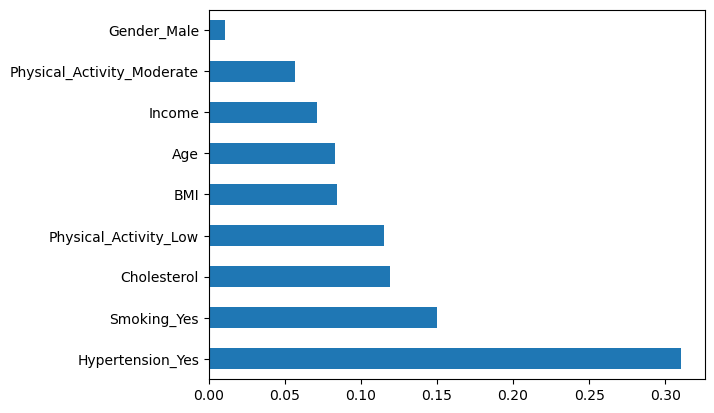

In [13]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


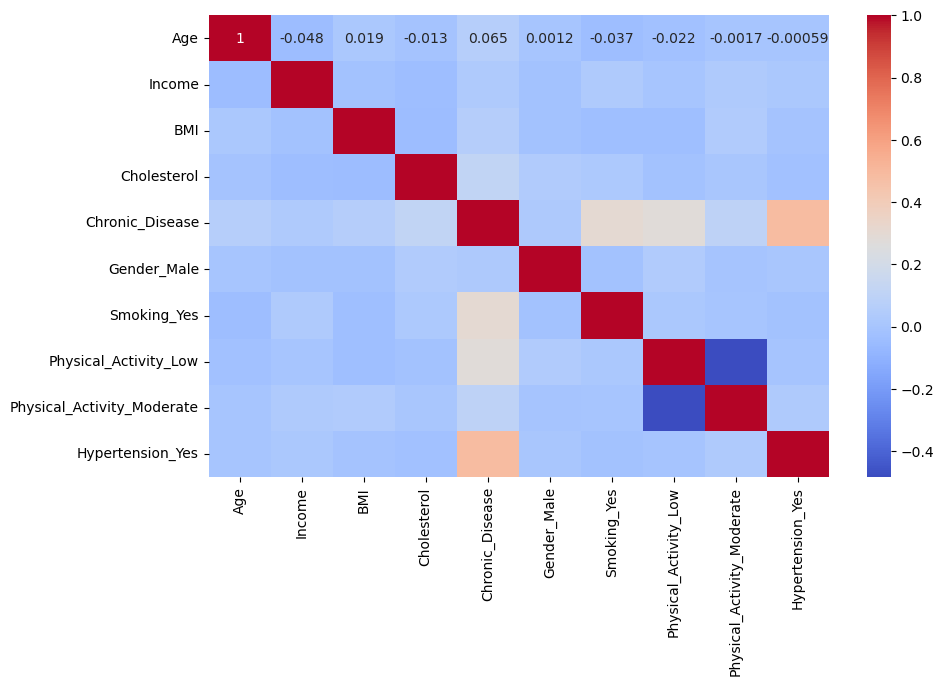

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
